#HW #1. Improve code Efficiency: Sort First!

## Scenario.

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs.

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.)

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax
import time

Answer Question #1 in the comments of the code chunk below.

In [2]:
def computeAllTPRs(true_label, confs):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far                         # O(1)
        totalPositives = sum(true_label)                                                      # O(n)
        totalNegatives = len(true_label) - totalPositives                                     # O(1)
        truePositives = 0                                                                     # O(1)
        falsePositives = 0                                                                    # O(1)
        # Hint: Consider Memory Management      
        truePositiveRate = []                                                                 # O(1)
        falsePositiveRate = []                                                                # O(1)

        #Hint: Although not explicitly clear, the loop structure below is an
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.

        # Iterate over all relevant thresholds. Compute TPR and FPR for each and
        # append to truePositiveRate , falsePositiveRate lists.

        for i in range(len(confs)):                                                           # O(n)
          maxVal = max(confs)  # Hint: the max method does NOT run in O(1)                    # O(n)   
          argMax = argmax(confs)                                                              # O(n)
          confs[argMax] = sentinelValue                                                       # O(1)
          if true_label[argMax]==1:                                                           # O(1)
            truePositives += 1                                                                # O(1)
          else:                                                                               # O(1)
            falsePositives += 1                                                               # O(1)

          truePositiveRate.append(truePositives/totalPositives)                               # O(1)
          falsePositiveRate.append(falsePositives/totalNegatives)                             # O(1)

        # return truePositiveRate and falsePositiveRate
        return truePositiveRate, falsePositiveRate


**Time Complexity:**
T(n) = O(n) + O(n)(O(n)) = O(n) + O(n^2) = O(n^2)

Below, provide your implementation for Question #2.

In [3]:
def computeAllTPRs_improved(true_label, confs):
        # define totalPositives, totalNegatives, truePositives, falsePositives, truePositiveRate, falsePositiveRate                       
        totalPositives = sum(true_label)                                                      # O(n)                                            
        totalNegatives = len(true_label) - totalPositives                                     # O(1)                                     
        truePositives = 0                                                                     # O(1)                                     
        falsePositives = 0                                                                    # O(1)                                      
        truePositiveRate = []                                                                 # O(1)                                     
        falsePositiveRate = []                                                                # O(1)                                     

        # zip, sort, then unzip
        sorted_combined = sorted(zip(confs, true_label), reverse=True)                        # O(n*logn)
        s_confs, s_true_label = zip(*sorted_combined)                                         # O(n)

        # iterate over all relevant thresholds
        for i in range(len(s_confs)):                                                         # O(n)           
          if s_true_label[i]==1:                                                              # O(1)        
            truePositives += 1                                                                # O(1)      
          else:                                                                               # O(1)
            falsePositives += 1                                                               # O(1)

          # append to truePositiveRate , falsePositiveRate lists
          truePositiveRate.append(truePositives/totalPositives)                               # O(1)
          falsePositiveRate.append(falsePositives/totalNegatives)                             # O(1)  
        
        # return truePositiveRate and falsePositiveRate
        return truePositiveRate, falsePositiveRate     

**Time Complexity:**
T(n) = O(n) + O(nlogn) + O(n) + O(n) = O(n*logn)

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods.

**Prediction:** The improved method should be more efficient as input approaches infinity because as n grows, the difference in runtime between n^2 and n log n becomes increasingly larger.

In [37]:
def testComputeAllTPRs(numSamples):
    # create test data
    confList = []
    labels = []
    maxVal = 10000
    for i in range(0,numSamples):
        n = random.randint(1,maxVal)
        confList.append(n/maxVal)
        if n/maxVal > .5:
            lab = 1
        else:
            lab = 0
        labels.append(lab)
    
    # time original method
    start_time = time.time()
    tpr_o, fpr_o = computeAllTPRs(deepcopy(labels), deepcopy(confList))
    original_time = time.time() - start_time

    # time improved method
    start_time2 = time.time()
    tpr_i, fpr_i = computeAllTPRs_improved(deepcopy(labels), deepcopy(confList))
    improved_time = time.time() - start_time2

    original_time = original_time * 100000
    improved_time = improved_time * 100000
    
    # return
    return original_time, improved_time, labels, confList, tpr_o, fpr_o, tpr_i, fpr_i

In [59]:
o_time = {}
i_time = {}
labs = {}
confs = {}
tpr_o = {}
fpr_o = {}
tpr_i = {}
fpr_i = {}

seq = range(2, 500, 5)
for i in seq:
    o_time[i], i_time[i], labs[i], confs[i], tpr_o[i], fpr_o[i], tpr_i[i], fpr_i[i] = testComputeAllTPRs(i)

In [60]:
# spot check
print(o_time[202], i_time[202])
print(o_time[492], i_time[492])

387.4063491821289 16.117095947265625
1212.906837463379 35.309791564941406


In [62]:
import pandas as pd

# put into dataframe
dicts = [o_time, i_time, labs, confs, tpr_o, fpr_o, tpr_i, fpr_i]
df = pd.DataFrame(dicts).T
df.rename(columns={df.columns[0]:'o_time',
                   df.columns[1]:'i_time',
                   df.columns[2]:'labs',
                   df.columns[3]:'confs',
                   df.columns[4]:'tpr_o',
                   df.columns[5]:'fpr_o',
                   df.columns[6]:'tpr_i',
                   df.columns[7]:'fpr_i',}, inplace = True)

# reset index
df = df.reset_index(drop=False).rename(columns={'index': 'input size'})

df.head()

,input size,o_time,i_time,labs,confs,tpr_o,fpr_o,tpr_i,fpr_i
0,2,4.673004,0.905991,"[1, 0]","[0.6598, 0.4023]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]"
1,7,16.093254,1.597404,"[1, 0, 0, 0, 0, 0, 0]","[0.8603, 0.193, 0.2625, 0.2955, 0.4125, 0.4716...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.0, 0.16666666666666666, 0.3333333333333333,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.0, 0.16666666666666666, 0.3333333333333333,..."
2,12,17.499924,4.887581,"[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]","[0.4938, 0.5503, 0.9638, 0.4737, 0.3816, 0.314...","[0.16666666666666666, 0.3333333333333333, 0.5,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1666666666666...","[0.16666666666666666, 0.3333333333333333, 0.5,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1666666666666..."
3,17,19.812584,2.479553,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0.7378, 0.702, 0.1616, 0.0301, 0.111, 0.5815,...","[0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.111...","[0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.111..."
4,22,10.585785,2.193451,"[1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ...","[0.8116, 0.883, 0.5595, 0.8891, 0.335, 0.3484,...","[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


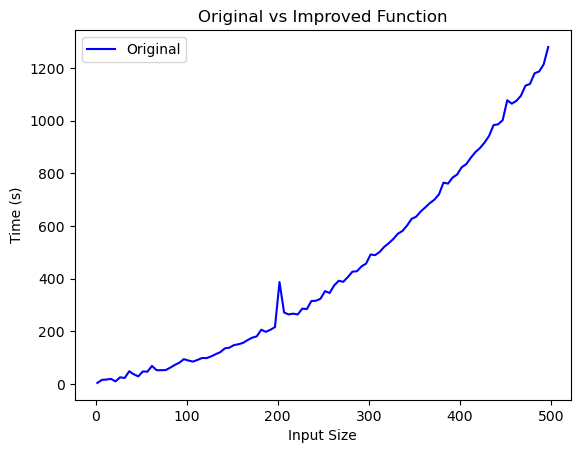

In [63]:
# create x and y values

input_size = df['input size']
o_time_y = df['o_time']
i_time_y = df['i_time']

# plot
plt.plot(input_size, o_time_y, color = 'blue', label='Original')

plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Original vs Improved Function')

plt.legend()

plt.show()


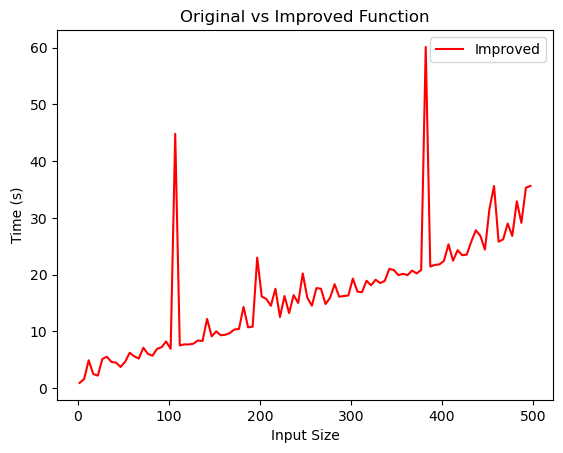

In [64]:
plt.plot(input_size, i_time_y, color = 'red', label='Improved')
plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Original vs Improved Function')

plt.legend()

plt.show()

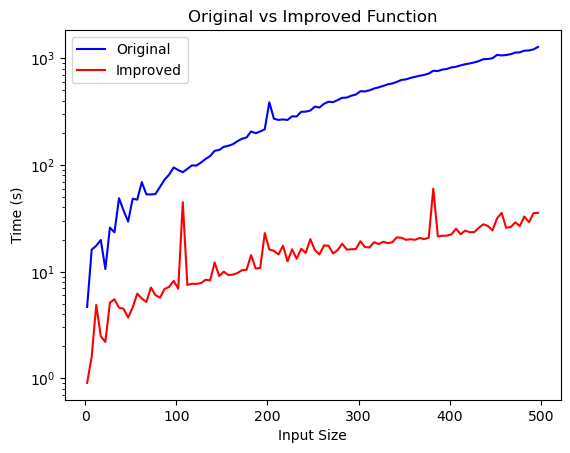

In [65]:
# plot
plt.plot(input_size, o_time_y, color = 'blue', label='Original')
plt.plot(input_size, i_time_y, color = 'red', label='Improved')

plt.xlabel('Input Size')
plt.ylabel('Time (s)')
plt.title('Original vs Improved Function')

plt.yscale('log')
plt.legend()

plt.show()

First, it is clear that the first function is O(n^2). However, I had trouble demonstrating the time complexity of the second function. I believe it is O(n*logn) because of sorted(). However, I cannot verify it based on the graph.